# Data Science Kata
These are a collection of notebooks with kata-style exercises on most popular packages and libararies used in machine learning and data science. 

The objective is to speed up the on boarding of the new members to a data science team. In a way, just like gettin a driver's license ensures that the licensee has the minimum knowledge and skills to drive a vehicle, going through this katas will provide all members with working knowledge of the package in question.

## Kata - Seaborn
Seaborn is one of the most popular visualization libraries in python. this Kata provides a summary cheatsheet of tips and techniques to work with Seaborn

### Installation:
the -q switch below trims the output. 

In [1]:
!pip install -q seaborn

You should consider upgrading via the '/Users/reza.alemy/Envs/alignment/bin/python -m pip install --upgrade pip' command.


In [2]:
### installing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### when working in Jupyter notebooks, the following magic command will make the graphs appear as output
%matplotlib inline
### when working with retina displays, the following magic command will enable 2x PNG images
%config InlineBackend.figure_format='retina'

In [4]:
### set styles (optional)
  #     the default style is the darkgrid. here is an example of how to change it.
sns.set(style = 'whitegrid')
  #     individual parameters can be set by using key:value pairs
sns.set(rc= {
    "font.style": "normal",
    "font.size": 10,
    "figure.titlesize": 20,
    "axes.labelsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,

    "axes.facecolor": "white",
    "grid.color": ".8",
    "figure.facecolor": "white",
    "text.color": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "axes.labelcolor": "black",

    "axes.grid": True,
    "grid.linestyle": "-",
})

### Load some data

In [7]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Scatter plot
The ```relplot()``` function of the seaborn library has its ```kind``` parameter set to generate scatter plot by default. 


this will plot two (or more) variables against each other. in the simplest form, it will take one column for horizontal and one column for the vertical axis

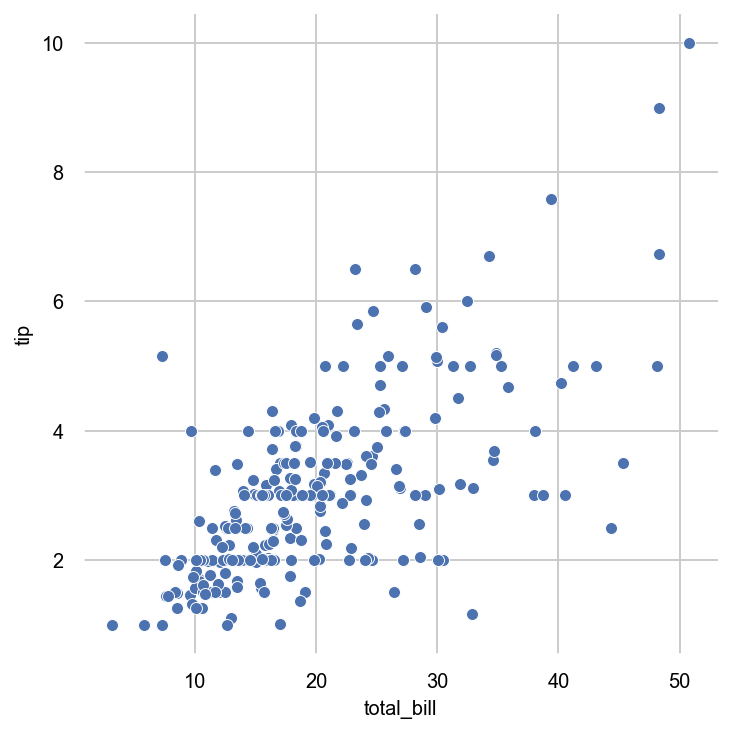

In [8]:
sns.relplot(x='total_bill', y='tip', data = df)

In [23]:
# the plot is an instance of the FacetGrid object. to inspect its public methods, we can apply a trick:
list(filter(lambda x: x[0]!='_', dir(sns.FacetGrid)))

['add_legend',
 'ax',
 'axes',
 'axes_dict',
 'despine',
 'facet_axis',
 'facet_data',
 'fig',
 'legend',
 'map',
 'map_dataframe',
 'savefig',
 'set',
 'set_axis_labels',
 'set_titles',
 'set_xlabels',
 'set_xticklabels',
 'set_ylabels',
 'set_yticklabels',
 'tight_layout']

## Adding more variables to the scatter plot
More variables can be added to the scatter plot, using the hue (different values result in different colors), style (different values result in different shapes) and size (bigger values result in larger sizes), or any combination of those.

#### Highlight categorical data in the scatter plot

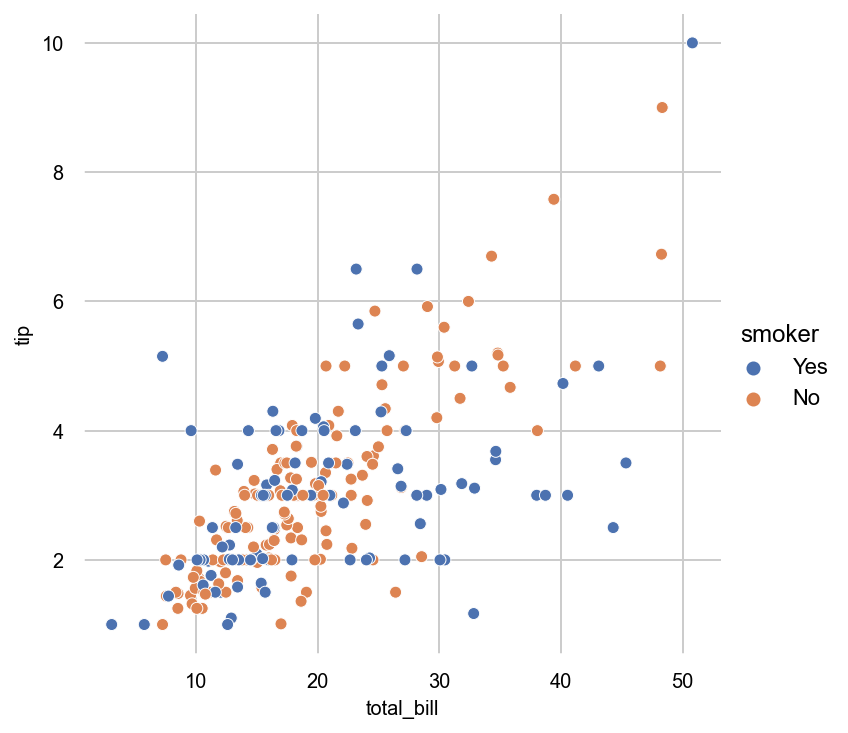

In [38]:
sns.relplot(x='total_bill', y='tip', data=df, hue='smoker')

#### Add another categorical variable

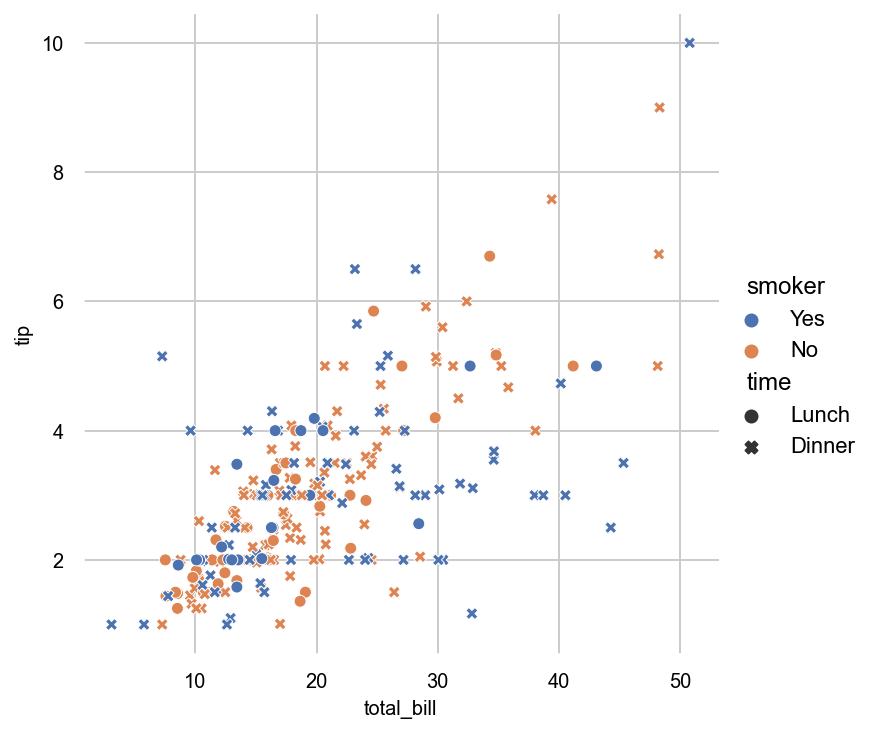

In [39]:
sns.relplot(x='total_bill', y='tip', data=df, hue='smoker', style="time")

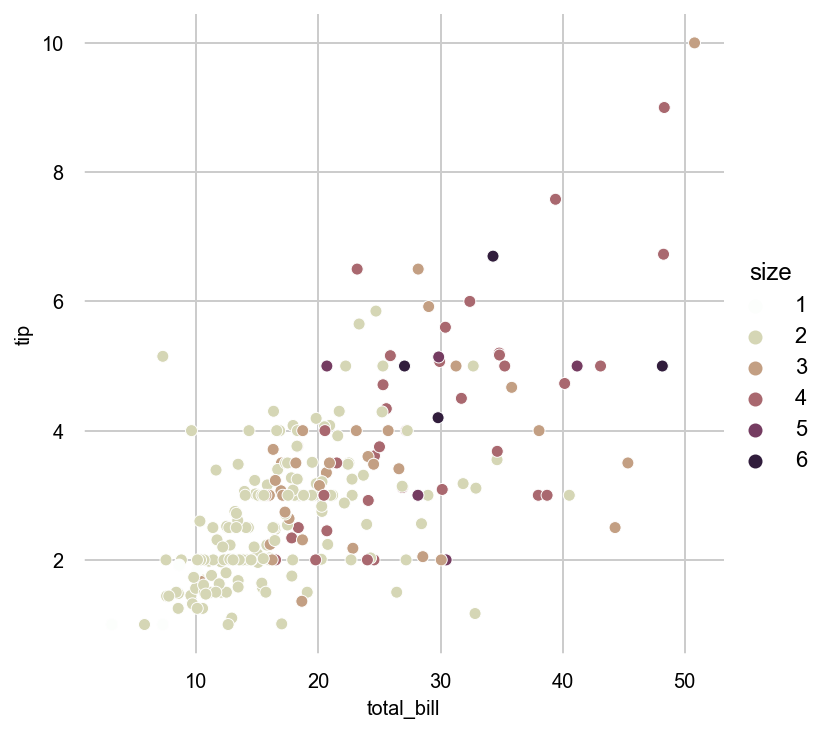

In [40]:
# use palette for higher number of classes
sns.relplot(x="total_bill", y="tip", hue="size", data=df, palette = "ch:r=0.6, l=0.99")

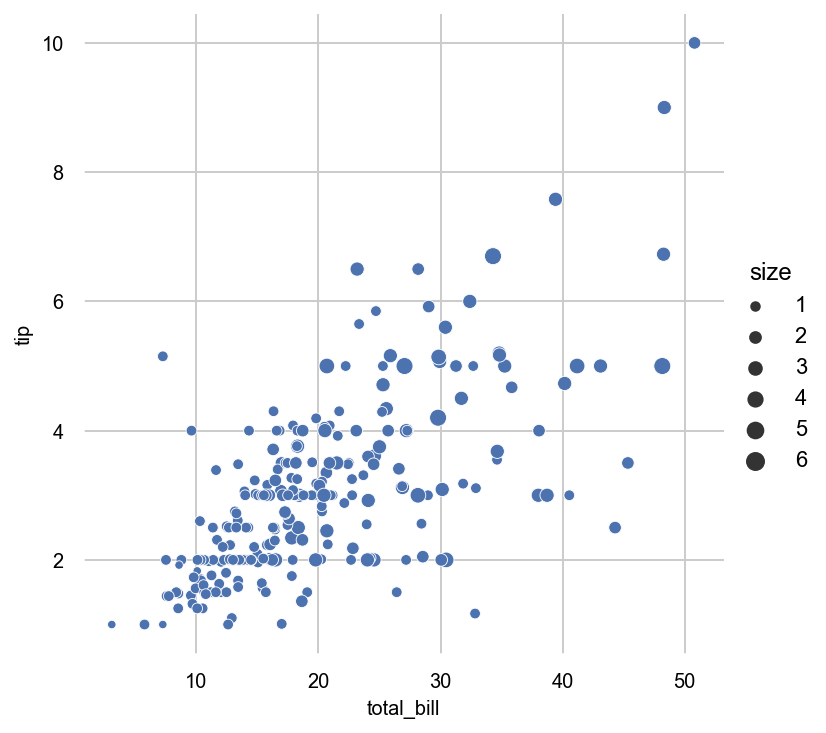

In [42]:
# use size when the data is continuous
sns.relplot(x="total_bill", y="tip", size="size", data=df)

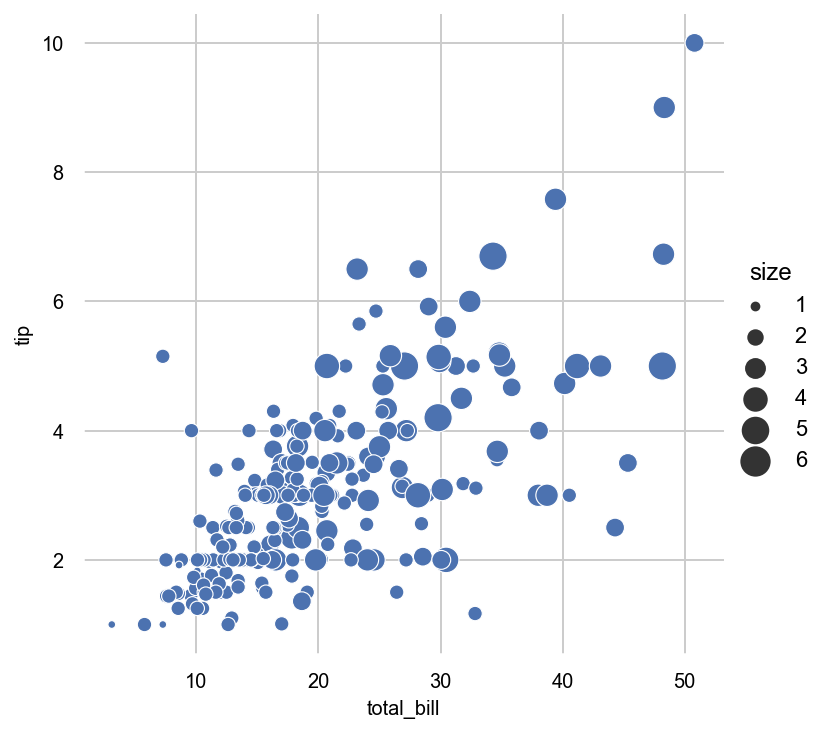

In [48]:
# control how the size grows
sns.relplot(x="total_bill", y="tip", size="size", data=df, sizes = (15,200))

# Line Plot
by changing the ```kind``` property to ```line```, the ```relplot()``` function will render a line plot.


In [53]:
df = pd.DataFrame(dict(time=np.arange(500), value=np.random.randn(500).cumsum()))
df.head()

,time,value
0,0,-0.187212
1,1,-2.266493
2,2,-0.722979
3,3,-0.154198
4,4,-0.257518


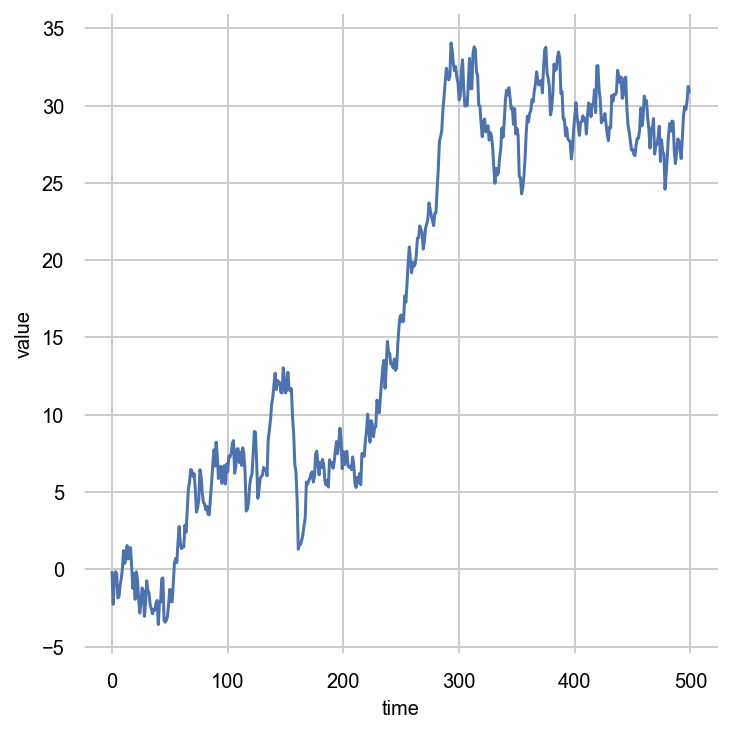

In [54]:
sns.relplot(kind='line', x='time', y='value', data=df)

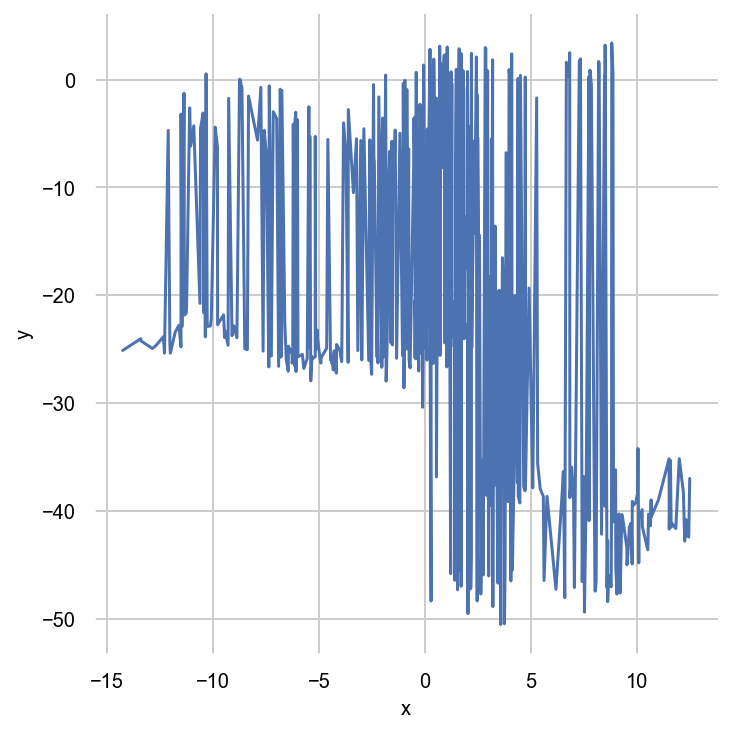

In [60]:
# if the x value is not sorted, the plot will sort it by default:
from numpy.random import randn
df=pd.DataFrame(randn(500,2).cumsum(axis=0), columns= ['x', 'y'])
sns.relplot(kind='line', x='x', y='y', data=df)

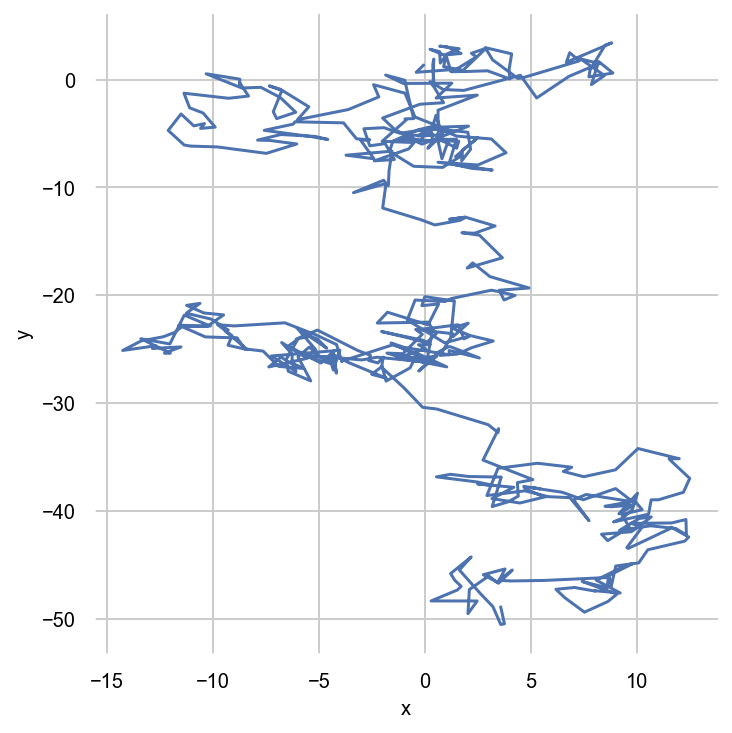

In [61]:
# but it can be instructed not to sort the x value
sns.relplot(kind='line', x='x', y='y', data=df, sort=False)

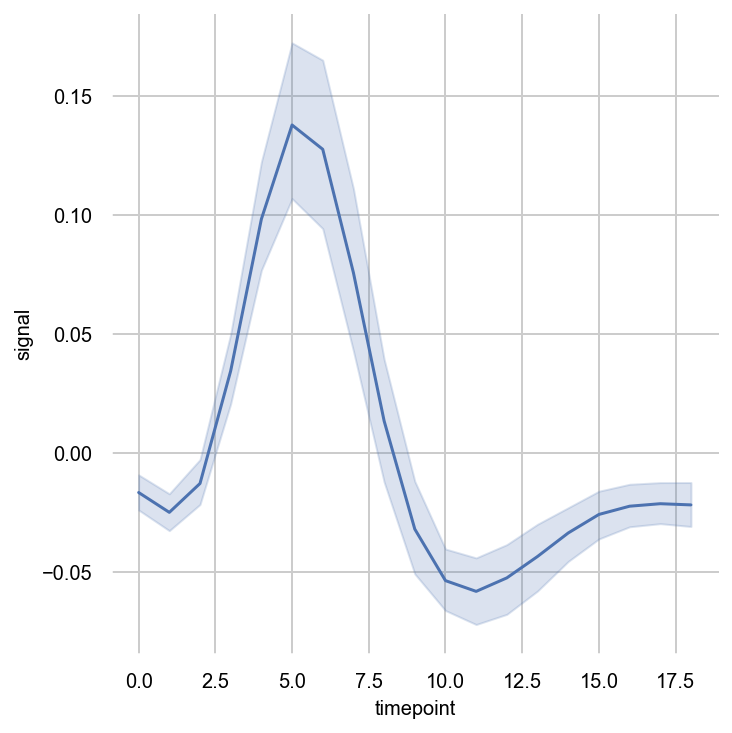

In [64]:
# when there are multiple values for the same x, the plot will have a confidence interval around an estimator:
df = sns.load_dataset('fmri')
sns.relplot(kind='line', x='timepoint', y='signal', data=df)

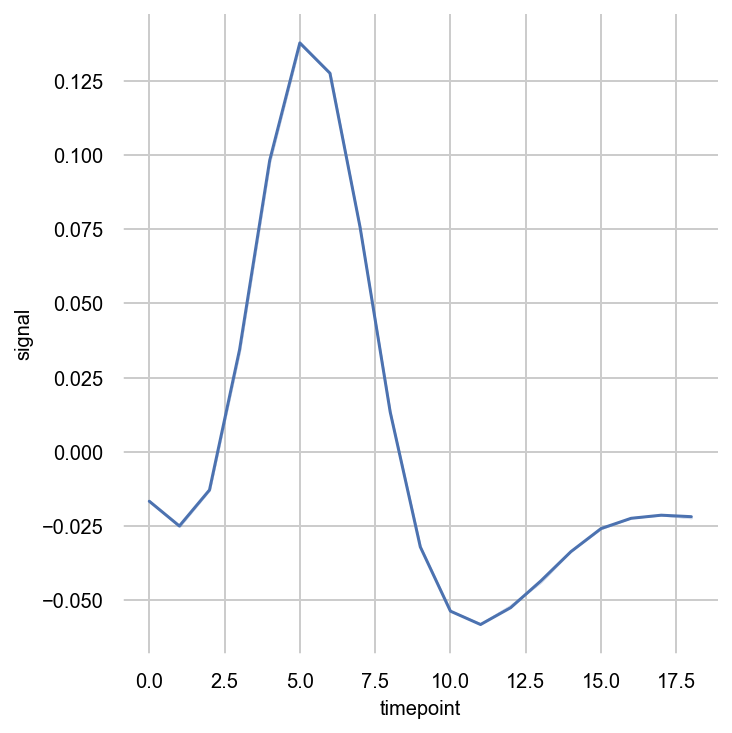

In [65]:
# the confidence interval can be removed:
sns.relplot(kind='line', x='timepoint', y='signal', data=df, ci=False)

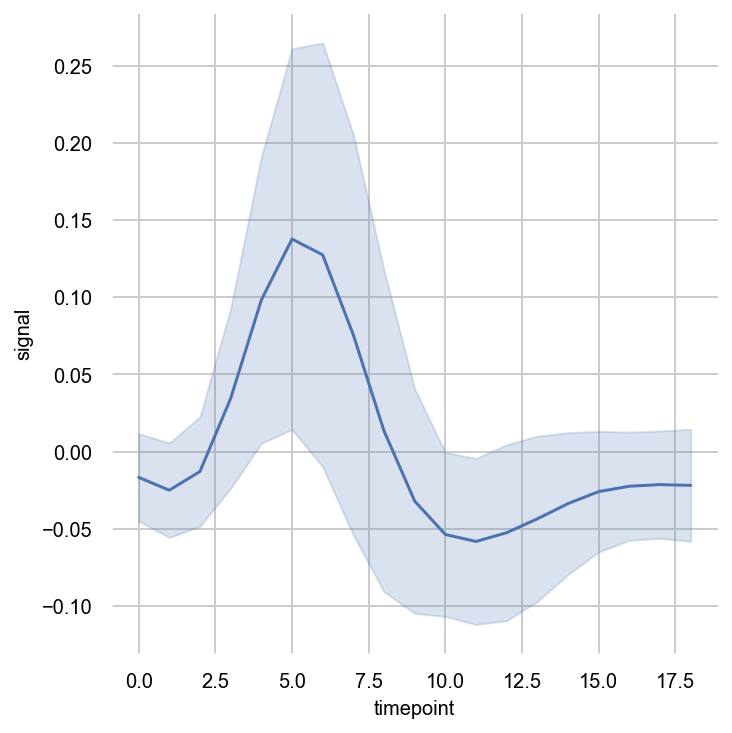

In [67]:
# Or it can be replaced by the std deviation
sns.relplot(kind='line', x='timepoint', y='signal', data=df, ci='sd')

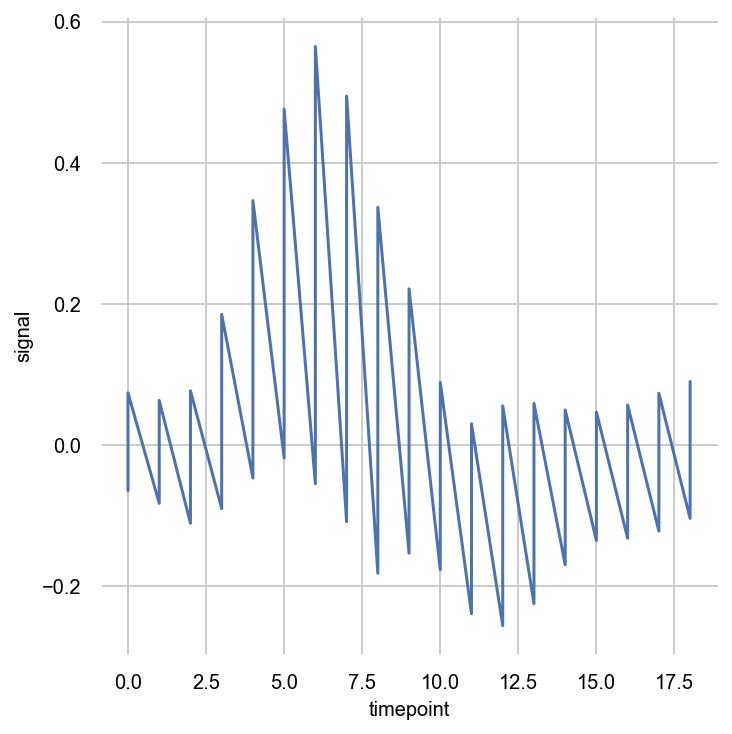

In [69]:
# the estimator can be removed completely
sns.relplot(kind='line', x='timepoint', y='signal', data=df, estimator=None)

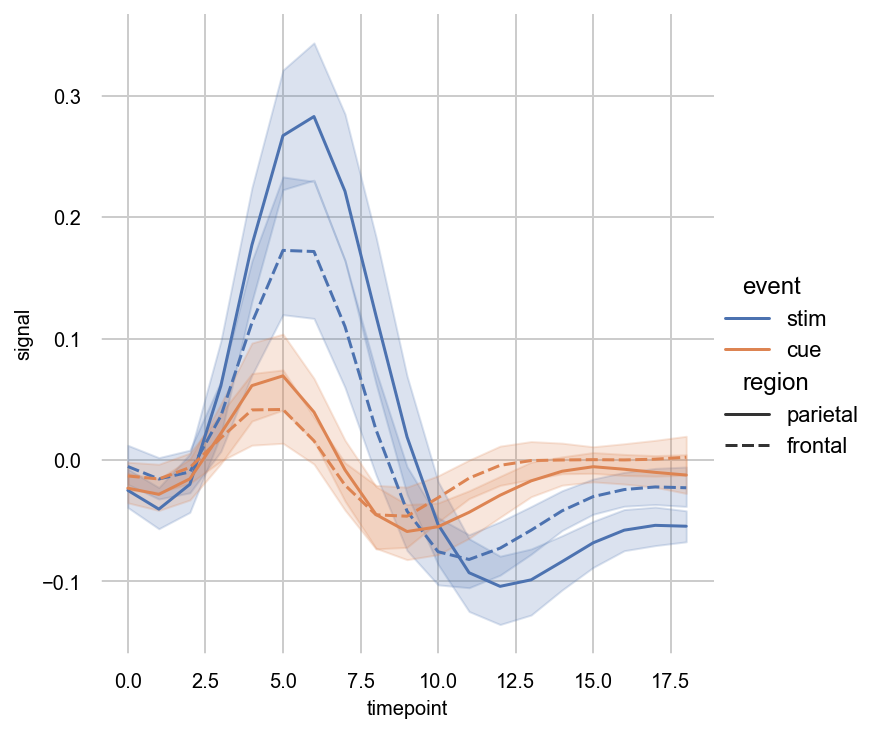

In [74]:
# Drill down by categorical variable, useing hue, style, or size
sns.relplot(kind='line', x='timepoint', y='signal', data=df, hue="event", style="region")

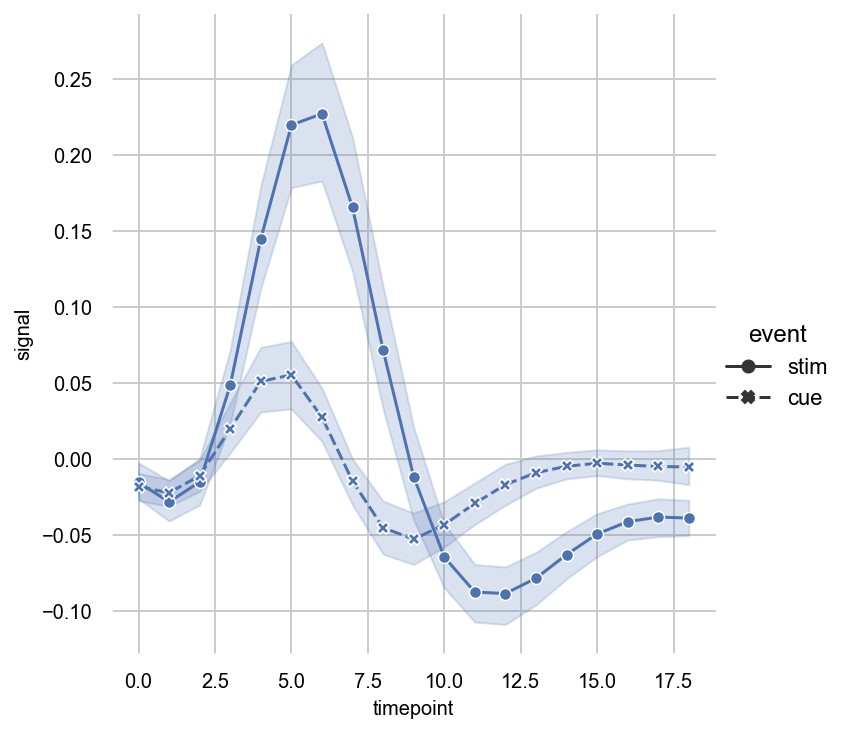

In [84]:
# mark the data points when style is present
sns.relplot(kind='line', x='timepoint', y='signal', data=df,  style="event",  markers=True)

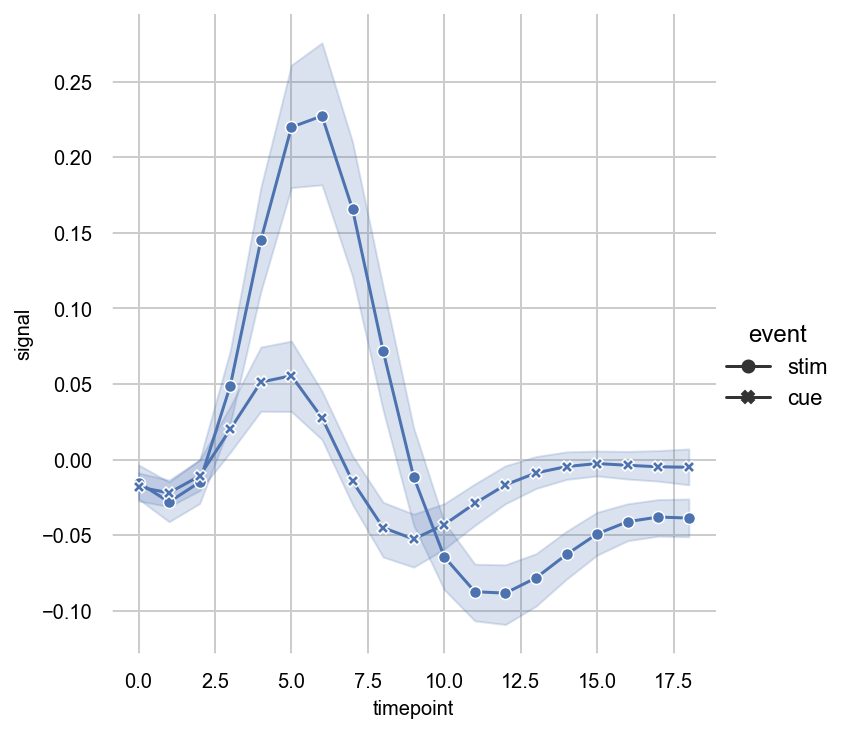

In [85]:
# have all lines drawn as solid
sns.relplot(kind='line', x='timepoint', y='signal', data=df,  style="event",  markers=True, dashes=False)

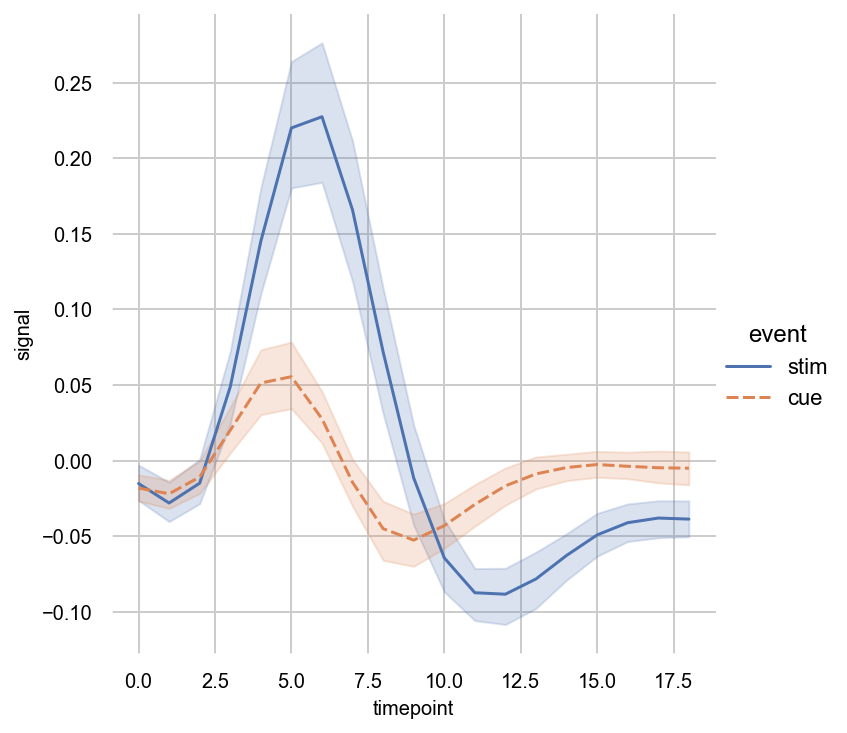

In [89]:
# both hue and style can look at the same thing
sns.relplot(kind='line', x='timepoint', y='signal', data=df,  hue="event", style="event")

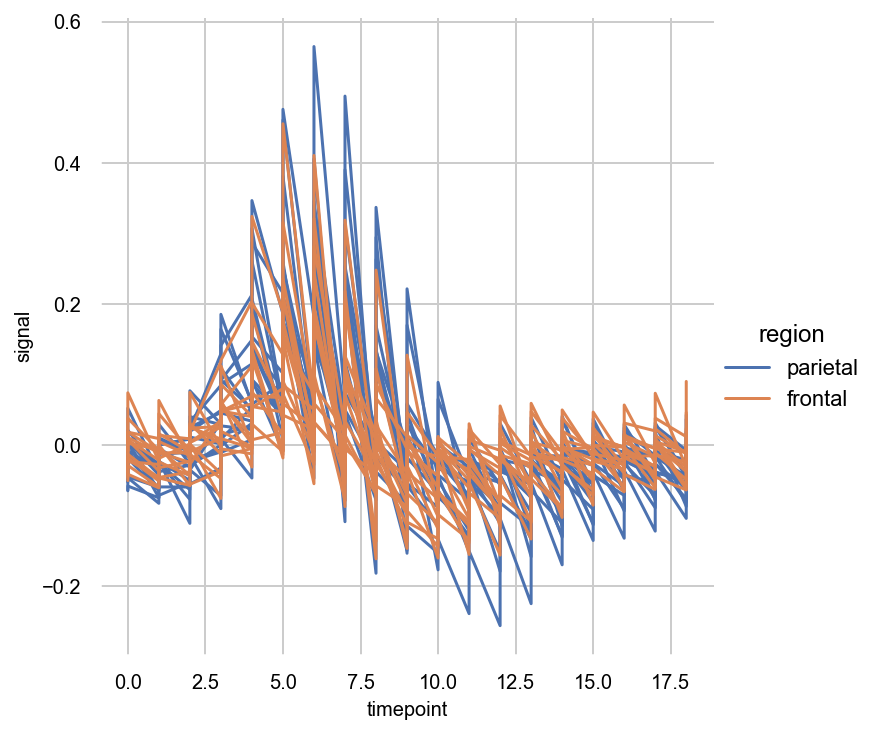

In [91]:
# we can plot subjects separately, but the estimator must be removed for that
sns.relplot(kind='line', x='timepoint', y='signal', data=df,  hue="region",  units='subject', estimator=None)

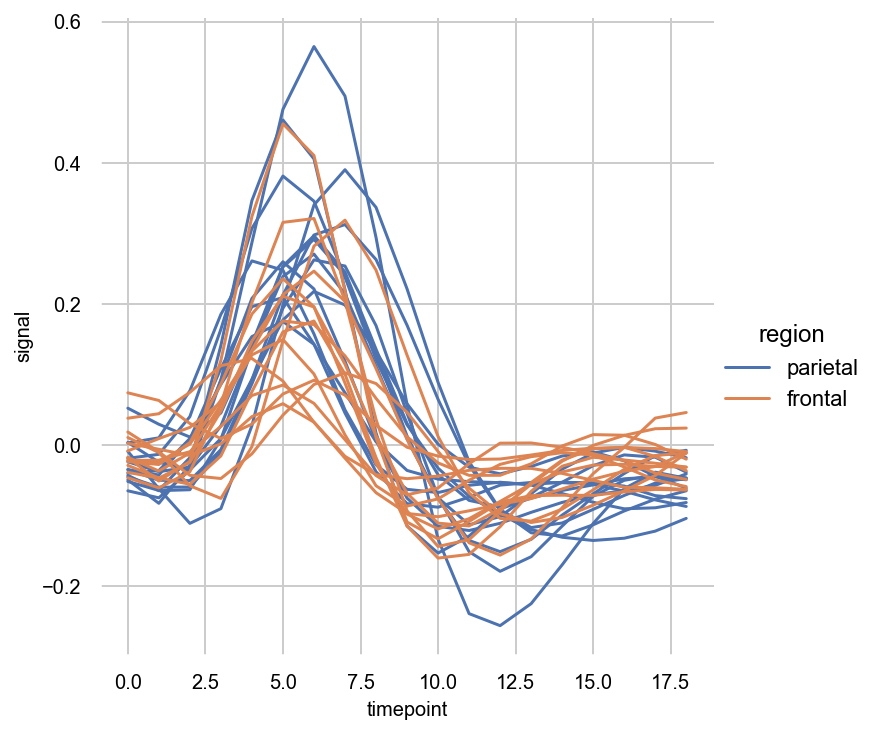

In [93]:
# inline querying of the data
sns.relplot(kind='line', x='timepoint', y='signal', data=df.query("event=='stim'"),  hue="region",  units='subject', estimator=None)

In [97]:
df = sns.load_dataset('dots').query("align=='dots'")

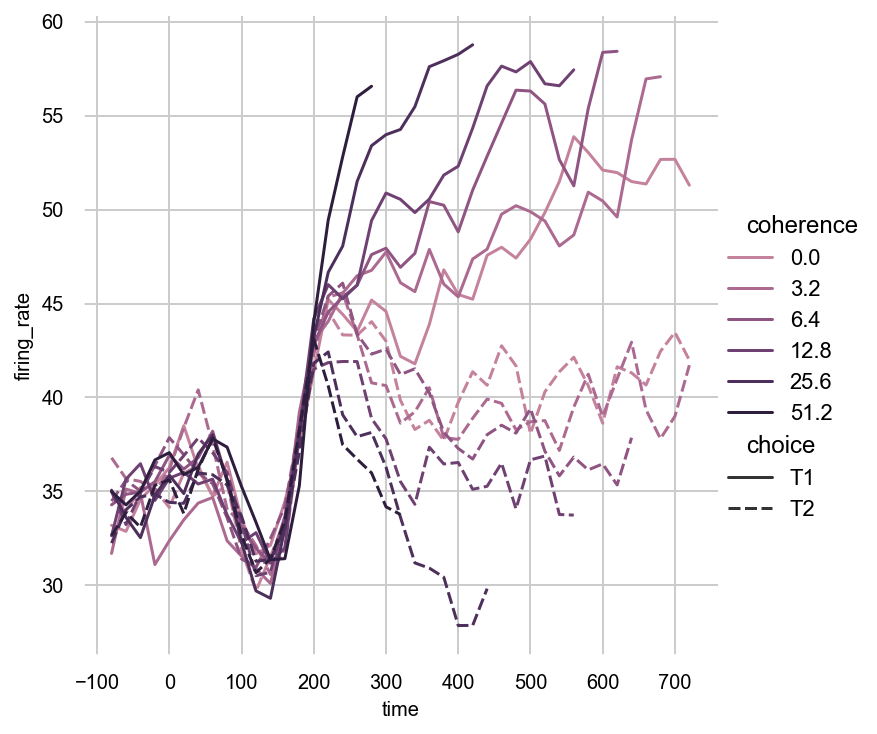

In [108]:
# provide a palette where the hue count is high. 
# the lightest hue is 0.6 in this case. the lower the number, the darker the lightest line.
palette = sns.cubehelix_palette(light=0.6, n_colors = 6)
sns.relplot(data=df, kind="line", x='time', y='firing_rate', hue="coherence", style="choice", palette=palette)

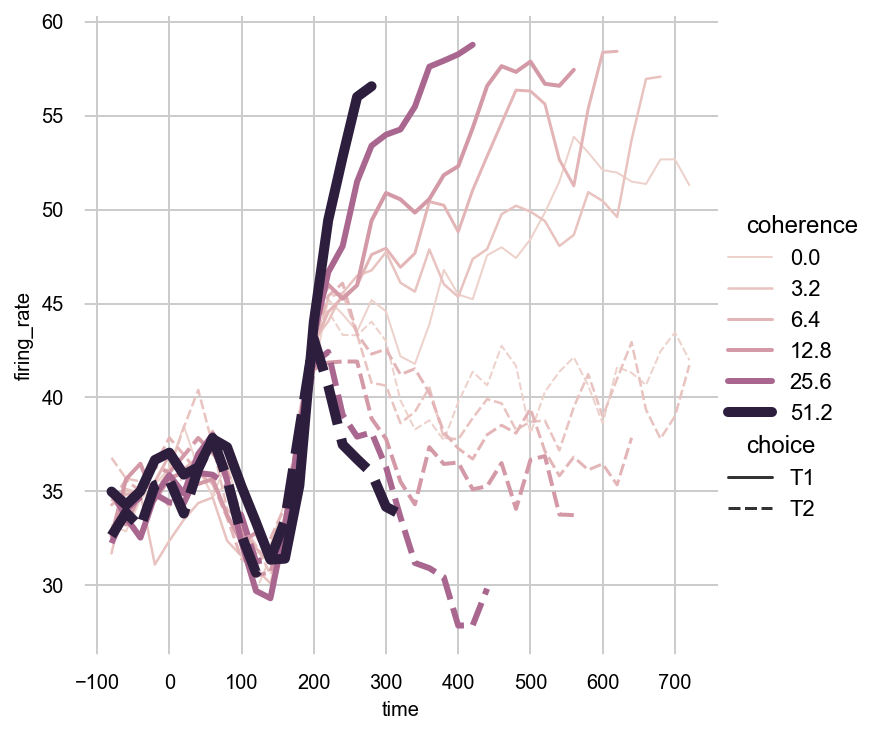

In [114]:
#using the size:

sns.relplot(data=df, kind='line', x='time', y='firing_rate', 
            hue='coherence', size='coherence', style='choice', sizes=(1,5))